# Projet numérique : lignes de niveau

In [19]:
import autograd
from autograd import numpy as np
import matplotlib.pyplot as plt

Exemples de fonction qui nous permettront de tester nos algorithmes :

In [35]:
def f(x,y):
    return(x**2+y**2)

def g(x,y):
    return(2*x**2+3*y)

def h(x,y):
    return(np.exp(x+y))

## Contour simple

### Amorce

D'après le théorème des valeurs intermédiaires, et par continuité de $y \rightarrow f(0,y)$, si $f(0,1) \leq c \leq f(0,0)$ ou $f(0,0) \leq c \leq f(0,1)$, alors il existe t tel que $f(0,t)=c$.
Si cette condition est remplie, on peut approcher la solution t par dichotomie.

In [38]:
def find_seed(g,c=0,eps=2**(-26)):
    a,b=0,1
    if ((g(0,1)<=c<=g(0,0)) or (g(0,0)<=c<=g(0,1))):
        while (b-a)>eps:
            if g(0,(b+a)/2)>c:
                b=(b+a)/2
            else:
                a=(b+a)/2
        return((b+a)/2)
    else:
        return None    

In [39]:
def find_seed_newton(g,c=0.0,eps=2**(-26)):
    init=0.1
    if ((g(0,1)<=c<=g(0,0)) or (g(0,0)<=c<=g(0,1))):
        def f(y):
            return(g(0,y)-c)
        Y=[init,-f(init)/autograd.grad(f)(init)]
        k=0
        while abs(Y[k]-Y[k+1])>eps :
            Y.append(Y[k]-(f(Y[k]))/autograd.grad(f)(Y[k]))
            k+=1
        return Y[-1]
    else:
        return None

#### Comparaison des deux algorithmes en précision et en rapidité

In [44]:
print(find_seed(f,0.25)-0.5)
print(find_seed_newton(f,0.25)-0.5)

print(find_seed(g,0.3)-0.1)
print(find_seed_newton(g,0.3)-0.1)

print(find_seed(h,2)-np.log(2.0))
print(find_seed_newton(h,2.0)-np.log(2.0))

7.450580596923828e-09
5.37225819385867e-12
1.4901161138336505e-09
0.0
-5.545926273775592e-09
4.440892098500626e-16


L'algorithme qui utilise la méthode de Newton a dans chacun des cas testés une bien meilleure précision.

In [45]:
import time

start_time = time.time()
find_seed(f,0.25)
print("Temps d execution : %s secondes ---" % (time.time() - start_time))

start_time = time.time()
find_seed_newton(f,0.1)
print("Temps d execution : %s secondes ---" % (time.time() - start_time))

start_time = time.time()
find_seed(g,0.3)
print("Temps d execution : %s secondes ---" % (time.time() - start_time))

start_time = time.time()
find_seed_newton(g,0.3)
print("Temps d execution : %s secondes ---" % (time.time() - start_time))

start_time = time.time()
find_seed(h,2.0)
print("Temps d execution : %s secondes ---" % (time.time() - start_time))

start_time = time.time()
find_seed_newton(h,2.0)
print("Temps d execution : %s secondes ---" % (time.time() - start_time))

Temps d execution : 0.0009953975677490234 secondes ---
Temps d execution : 0.004997968673706055 secondes ---
Temps d execution : 0.0009610652923583984 secondes ---
Temps d execution : 0.0019903182983398438 secondes ---
Temps d execution : 0.0009913444519042969 secondes ---
Temps d execution : 0.004002571105957031 secondes ---


La méthode par dichotomie est dans chacun des exemples plus rapide (facteur 10) que la méthode de Newton. 

### Propagation

**Propriété 1:**
Soit $E$ un espace euclidien.
Soit $U$ un ouvert de $E$ et $f:U\rightarrow \mathbb{R}$ différentiable en $a \in U$
Soit $X$ la ligne de niveau de $f$ passant par a. $X=\{x \in U / f(x)=a\}$
Soit $h \in E$.
Si h est tangent à $X$, alors $\langle h,\vec{\mathrm{grad}}f(a) \rangle = 0$

On utilise cette propriété pour trouver à chaque étape un vecteur tangent à la ligne de niveau et on avance de \delta dans cette direction

In [7]:
def tang_norm(f,x,y,delta=0.01):
    """retourne un vecteur, de norme delta, orthogonal au gradient de f en (x,y), donc tangent à la ligne de niveau de f en (x,y)"""
    g=autograd.grad
    normed=delta/((g(f,0)(x,y)**2+g(f,1)(x,y)**2)**(0.5))
    return np.r_[g(f,1)(x,y)*normed,-g(f,0)(x,y)*normed]

tang_norm(f,0.0,0.5)


array([ 0.01, -0.  ])

In [13]:
def simple_contour (f,c=0.0,d=0.01):
    eps=2**(-25)
    x,y=[],[]
    t=find_seed(f,c)
    if isinstance(t,float):
        x.append(0.0)
        y.append(t)
        (xi,yi)=(0.0,t)+tang_norm(f,0.0,t,d)
        while (xi>eps and (1-eps)>xi and yi>eps and (1-eps)>yi):
            x.append(xi)
            y.append(yi)
            (xi,yi)=(xi,yi)+tang_norm(f,xi,yi,d)
        return (np.array(x),np.array(y))
    else:
        return (np.array(x),np.array(x))
    

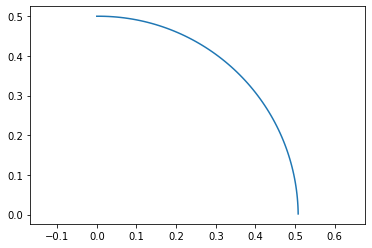

In [14]:
X,Y=simple_contour(f,0.25,0.01)
plt.plot(X,Y)
plt.axis("equal")
plt.show()